# Exploratory Data Analysis(EDA) with IEEE-CIS Fraud Detection Data Set
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

* To take a closer look at the data take help of `.head()` function of pandas library which returns first five observations of the data set.Similarly `.tail()` returns last five observations of the data set.
* To found out the total number of rows and columns in the data set using `.shape`.
* To see label of each columns in the data set using `.columns.values`
* It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not with `.info()`
* The `.describe()` function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
* Few key insights just by looking at dependent variable are as follows:
    * `.unique()`
    * `.value_counts()`
* To chech missing values in the data set's columns using `.isnull().sum()`
* To use `linear regression` for modelling,its necessary to remove correlated variables to improve your model.One can find correlations using pandas `.corr()` function and can visualize the correlation matrix using a heatmap in seaborn.
    * Dark shades represents positive correlation while lighter shades represents negative correlation.
    * If you set annot=True, you’ll get values by which features are correlated to each other in grid-cells.
    * It’s a good practice to remove correlated variables during feature selection.
* To check `Outliers`: `A box plot` (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.
* To check `the linearity of the variables` it is a good practice to `plot distribution graph` and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

## Data Description:
### Transaction Table 
    * TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
    * TransactionAMT: transaction payment amount in USD
    * ProductCD: product code, the product for each transaction
    * card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
    * addr: address
    * dist: distance
    * P_ and (R__) emaildomain: purchaser and recipient email domain
    * C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
    * D1-D15: timedelta, such as days between previous transaction, etc.
    * M1-M9: match, such as names on card and address, etc.
    * Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
### Categorical Features:
    * ProductCD
    * card1 - card6
    * addr1, addr2
    * P_emaildomain
    * R_emaildomain
    * M1 - M9

### Identity Table
    * Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
    * They're collected by Vesta’s fraud protection system and digital security partners.
    * (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

    * “id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately.”
    
### Categorical Features:
    * DeviceType
    * DeviceInfo
    * id_12 - id_38   

In [1]:
%load_ext lab_black

In [2]:
# This library is to work with Data Frames
import pandas as pd

# This library is to work with vectors
import numpy as np

# This library is to visualise statistical graphs
import seaborn as sns

# This library is to visualise graphs
import matplotlib.pyplot as plt

# To set some ploting parameters
from matplotlib import rcParams

# Library to work with Regular Expressions
import re

# To ignore filterwarnings
import warnings

# This library is to create dispays
from IPython.display import Image

# Calling reporting functions from util_reporting
from util_reporting import (
    swarmplot_viz,
    crosstab_viz,
    factor_plot_viz,
    relationship_viz,
    df_first_look,
    df_descriptive_statistics,
    countplot_viz,
    df_pivot_aggregated_statistics,
    multiple_plot_viz,
    boxplot_viz,
    histogram_viz,
    distplot_viz,
    correlation_chart,
)

# Calling reporting functions from util_data_cleaning
from util_data_cleaning import (
    extract_first_string,
    df_numeric_column_filler_with_aggregated_data,
    calculating_zscore,
    missing_data_finder,
)

%matplotlib inline
warnings.filterwarnings("ignore")
%config Completer.use_jedi = False

# Seting a universal figure size<
rcParams["figure.figsize"] = 8, 6

In [3]:
# Transaction CSVs
train_transaction = pd.read_csv("train_transaction.csv")
test_transaction = pd.read_csv("test_transaction.csv")
# Identity CSVs - These will be merged onto the transactions to create additional features
train_identity = pd.read_csv("train_identity.csv")
test_identity = pd.read_csv("test_identity.csv")
# Sample Submissions
sample_submission = pd.read_csv("sample_submission.csv")

### The First Looking to Data Set:
* I called `df_first_look` from `util_reporting.py`. 
* This function returns;
    * First 5 rows of dataframe
    * Last 5 rows of dataframe
    * Row count of dataframe
    * Column count of dataframe
    * List of columns in the dataframe
    * Looking NaN values and datatypes of columns in the dataframe

In [4]:
df_first_look(train_transaction)

First 5 rows of dataframe:
--------------------------
    TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338 

In [5]:
df_first_look(train_identity)

First 5 rows of dataframe:
--------------------------
    TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T

In [6]:
df_first_look(test_transaction)

First 5 rows of dataframe:
--------------------------
    TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  ...  V330  V331  V332  V333 V334 V335  \
0  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
1  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
2  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
3  150.0        visa  166.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
4  150.0  mastercard  117.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   

   V336  V337  V338  V339  
0  

In [7]:
df_first_look(test_identity)

First 5 rows of dataframe:
--------------------------
    TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  id-08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
4        3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   

   id-09  ...                    id-31  id-32     id-33           id-34  \
0    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   
1    0.0  ...  chrome 67.0 for android   24.0  1280x720  match_status:2   
2    NaN  ...       ie 11.0 for tablet    NaN       NaN             NaN   
3    0.0  ...  chrome 67.0 for android    NaN       NaN             NaN   
4    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   

   id-35 id-36 id-3

In [8]:
df_first_look(sample_submission)

First 5 rows of dataframe:
--------------------------
    TransactionID  isFraud
0        3663549      0.5
1        3663550      0.5
2        3663551      0.5
3        3663552      0.5
4        3663553      0.5

Last 5 rows of dataframe:
--------------------------
         TransactionID  isFraud
506686        4170235      0.5
506687        4170236      0.5
506688        4170237      0.5
506689        4170238      0.5
506690        4170239      0.5

Row count of dataframe:
-----------------------
 506691 
Column count of dataframe:
--------------------------
 2

List of columns in the dataframe:
---------------------------------
 ['TransactionID' 'isFraud']

Looking NaN values and datatypes of columns in the dataframe:
--------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  506691

* Except sample_submission;
    * Data sets contain Float, integer and object types of data.
    * All data sets contain null/missing values. 

In [20]:
# To see, how much TransactionIDs in train_transaction have an associated train_identity.
print(
    np.sum(
        train_transaction["TransactionID"].isin(
            train_identity["TransactionID"].unique()
        )
    )
)
# To see, how much TransactionIDs in test_transaction have an associated test_identity.
print(
    np.sum(
        test_transaction["TransactionID"].isin(test_identity["TransactionID"].unique())
    )
)

144233
141907


* 24.4% of TransactionIDs in train have an associated train_identity.
* 28.0% of TransactionIDs in test have an associated test_identity.

## Data Data Wrangling:
### To Check Missing Values:

* I called `missing_data_finder` from `util_data_cleaning.py`. 
* This function returns;
    * Finding missing values and showing these percentages in the columns of the dataframe. 

In [10]:
missing_data_finder(train_transaction).head()

,column_name,missing_row_count,missing_row_percent
14,dist2,552913,0.9363
37,D7,551623,0.9341
43,D13,528588,0.8951
44,D14,528353,0.8947
42,D12,525823,0.8904


In [11]:
missing_data_finder(train_identity).head()

,column_name,missing_row_count,missing_row_percent
24,id_24,139486,0.9671
25,id_25,139101,0.9644
7,id_07,139078,0.9643
8,id_08,139078,0.9643
21,id_21,139074,0.9642


In [12]:
missing_data_finder(test_transaction).head()

,column_name,missing_row_count,missing_row_percent
13,dist2,470255,0.9281
36,D7,446558,0.8813
41,D12,437437,0.8633
38,D9,432353,0.8533
37,D8,432353,0.8533


In [13]:
missing_data_finder(test_identity).head()

,column_name,missing_row_count,missing_row_percent
24,id-24,137167,0.9666
25,id-25,136868,0.9645
26,id-26,136860,0.9644
21,id-21,136848,0.9643
7,id-07,136848,0.9643


##### Observations: 
* We found NaN values of columns in dataframes. 
* 374 columns of total columns (394) of train_transaction dataframe have NaN values. 
* 38 columns of total columns (41) of train_identity dataframe have NaN values. 
* 345 columns of total columns (393) of test_transaction dataframe have NaN values. 
* 38 columns of total columns (41) of train_identity dataframe have NaN values. 
* We won't fill columns' NaN values that have  more than %51 missing_row_percent. 

### TransactionAmt:

In [14]:
print("Mode of train transaction amt : ", train_transaction[["TransactionAmt"]].mode())
print("Mode test transaction amt:", test_transaction[["TransactionAmt"]].mode())

Mode of train transaction amt :     TransactionAmt
0            59.0
Mode test transaction amt:    TransactionAmt
0            59.0


In [15]:
print("Statistics of train : ", train_transaction[["TransactionAmt"]].describe())
print("Statistics of test :", test_transaction[["TransactionAmt"]].describe())

Statistics of train :         TransactionAmt
count   590540.000000
mean       135.027176
std        239.162522
min          0.251000
25%         43.321000
50%         68.769000
75%        125.000000
max      31937.391000
Statistics of test :        TransactionAmt
count   506691.000000
mean       134.725568
std        245.779822
min          0.018000
25%         40.000000
50%         67.950000
75%        125.000000
max      10270.000000


In [16]:
print(
    "Mean transaction amt for fraud is {:.4f}".format(
        train_transaction.loc[train_transaction["isFraud"] == 1][
            "TransactionAmt"
        ].mean()
    )
)
print(
    "Mean transaction amt for non-fraud is {:.4f}".format(
        train_transaction.loc[train_transaction["isFraud"] == 0][
            "TransactionAmt"
        ].mean()
    )
)

Mean transaction amt for fraud is 149.2448
Mean transaction amt for non-fraud is 134.5117


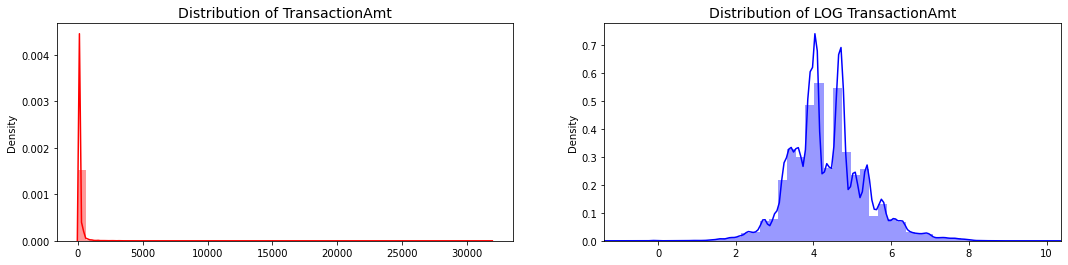

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

time_val = train_transaction["TransactionAmt"].values

sns.distplot(time_val, ax=ax[0], color="r")
ax[0].set_title("Distribution of TransactionAmt", fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(np.log(time_val), ax=ax[1], color="b")
ax[1].set_title("Distribution of LOG TransactionAmt", fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

plt.show()

NameError: name 'df_transaction' is not defined

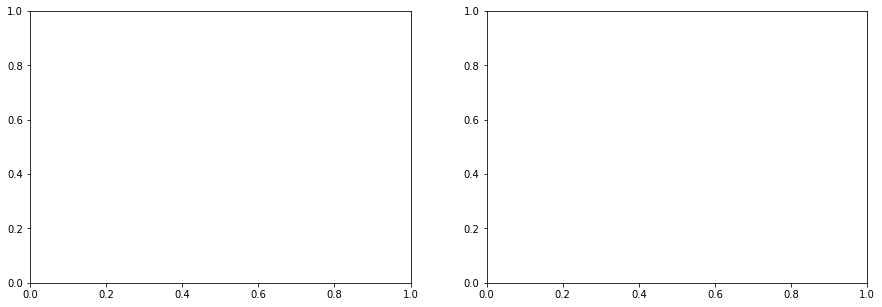

In [18]:
f,ax=plt.subplots(1,2,figsize=(15,5))
train_transaction[df_transaction['isFraud'] == 0]\
['TransactionAmt'].apply(np.log) \
.plot.hist(ax=ax[0],bins=100,color='darkorange')
ax[0].set_title('NonFraud Amount Distribution')
x1=list(range(0,10,5))
ax[0].set_xticks(x1)
    
train_transaction[df_transaction['isFraud'] == 1]\
['TransactionAmt'].apply(np.log) \
.plot.hist(ax=ax[1],bins=100)
ax[1].set_title('Fraud Amount Distribution')
x2=list(range(0,15,5))
ax[1].set_xticks(x2)

##### Observations: 
* Avg TransactionAmt and median-mode are not closely. Distribution is right skewed (positive skew). The Avg of transaction amount is $135. 
* There are outliers at TransactionAmt column. 
* I've taken a log transform in some of these plots to better show the distribution- otherwise the few, very large transactions skew the distribution. Because of the log transfrom, any values between 0 and 1 will appear to be negative.
* Fraudulent charges appear to have a higher average transaction amount. 

### Understanding Target Variable

#### isFraud Column

In [ ]:
sns.countplot(x='isFraud', data=df_transaction, palette="mako")
plt.xlabel("isFraud", fontsize=14) #seting the xtitle and size
plt.ylabel("Count", fontsize=14) # Seting the ytitle and size
plt.title("Fraud Distribution", fontsize=15) 
plt.xticks(rotation=45)

In [ ]:
df_transaction.isFraud.value_counts()

* "isFraud" shows fraud and nonfraud transactions that are from 0: nonFraud, 1: Fraud
* There are 20663 fraud transaction in all data. 
* Most of the transactions are non-fraud.

#### TransactionDT Column

In [ ]:
print('Shape of train : ', train_transaction[['TransactionDT']].shape[0])
print('Shape of test : ', test_transaction[['TransactionDT']].shape[0])

In [ ]:
print('Unique value count of train : ', train_transaction[['TransactionDT']].nunique())
print('Unique value count of test : ', test_transaction[['TransactionDT']].nunique())

In [ ]:
train_transaction['TransactionDT'].plot(kind='hist',
                                        figsize=(15, 5),
                                        label='train',
                                        bins=50,
                                        title='Train vs Test TransactionDT Distribution')
test_transaction['TransactionDT'].plot(kind='hist',
                                       label='test',
                                       bins=50)
plt.legend()